### Mnist
* Conv2D => 32, 64
* Pooling
* dropout
* Flatten => Must-do
* Hidden => 128
* dropout
* output => 10


Epoch 1: val_loss improved from inf to 0.05558, saving model to ./model\01-0.0556.hdf5

Epoch 2: val_loss improved from 0.05558 to 0.03815, saving model to ./model\02-0.0381.hdf5

Epoch 3: val_loss improved from 0.03815 to 0.03418, saving model to ./model\03-0.0342.hdf5

Epoch 4: val_loss improved from 0.03418 to 0.02936, saving model to ./model\04-0.0294.hdf5

Epoch 5: val_loss improved from 0.02936 to 0.02867, saving model to ./model\05-0.0287.hdf5

Epoch 6: val_loss improved from 0.02867 to 0.02759, saving model to ./model\06-0.0276.hdf5

Epoch 7: val_loss improved from 0.02759 to 0.02489, saving model to ./model\07-0.0249.hdf5

Epoch 8: val_loss did not improve from 0.02489

Epoch 9: val_loss did not improve from 0.02489

Epoch 10: val_loss did not improve from 0.02489

Epoch 11: val_loss did not improve from 0.02489

Epoch 12: val_loss did not improve from 0.02489

Epoch 13: val_loss did not improve from 0.02489

Epoch 14: val_loss improved from 0.02489 to 0.02385, saving model t

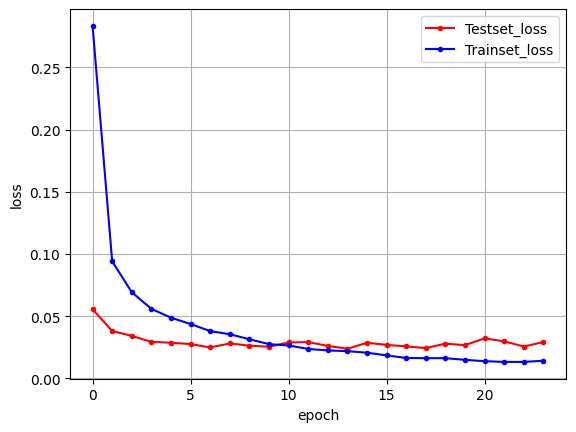

In [4]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# Mnist 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 차원 축소, 정규화
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float64') / 255

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 저장, 모델 최적화 단계에서 학습 자동 중단 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,
                              save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                   epochs=30, batch_size=200, verbose=0,
                   callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()